# Visualize results

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
data = np.loadtxt("weights/excitatory_2023-08-08 19:23:48.990953.tsv-943-0.dat", skiprows=3)
sender, t, w, target, _, _ = data.T

In [25]:
np.unique(sender)

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100., 101., 102., 103., 104., 105., 106., 107., 108., 109., 110.,
       111., 112., 113., 114., 115., 116., 117., 118., 119., 120., 121.,
       122., 123., 124., 125., 126., 127., 128., 129., 130., 131., 132.,
       133., 134., 135., 136., 137., 138., 139., 140., 141., 142., 143.,
       144., 145., 146., 147., 148., 149., 150., 15

Text(0.5, 1.0, 'Weight change')

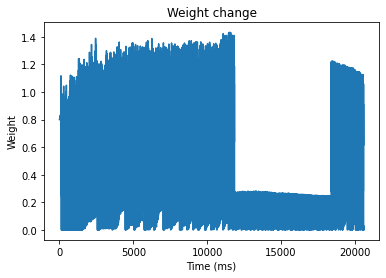

In [29]:
plt.plot(w[np.where(sender == 707)])
plt.xlabel("Time (ms)") 
plt.ylabel("Weight")
plt.title("Weight change")

In [11]:
data = np.loadtxt("spikes/spikes_exc_2023-08-08 20:02:44.939679.tsv-1887-0.dat", skiprows=3)
sender, ts = data.T

ts_int = ts.astype(int)

In [12]:
spikes = np.zeros(int(max(ts_int)) + 1)
for t, _ in zip(ts_int, sender):
    spikes[t] += 1

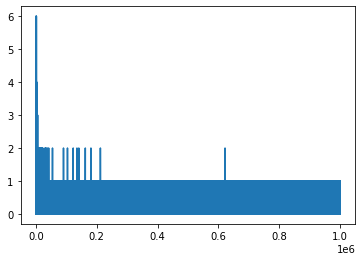

In [13]:
plt.plot(spikes)

In [28]:
import nest
import numpy as np
import matplotlib.pyplot as plt
import sys
from datetime import datetime
from pynestml.codegeneration.nest_code_generator_utils import NESTCodeGeneratorUtils



              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.4
 Built: Aug  2 2023 15:17:11

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



In [130]:
module_name, neuron_model_name, synapse_model_name = NESTCodeGeneratorUtils.generate_code_for(
    "mymodel_nest/izhikevich.nestml",
    "mymodel_nest/stdp_depression.nestml",
    post_ports=["post_spikes"])

nest.Install(module_name)

[7,izhikevich_custom7849465c1f8d4551a665e78a5fcebef7_nestml, WARNING, [12:8;12:17]]: Variable 'a' has the same name as a physical unit!
[8,izhikevich_custom7849465c1f8d4551a665e78a5fcebef7_nestml, WARNING, [15:8;15:17]]: Variable 'd' has the same name as a physical unit!
[14,stdp_depression7849465c1f8d4551a665e78a5fcebef7_nestml, WARNING, [6:8;6:17]]: Variable 'D' has the same name as a physical unit!
[15,stdp_depression7849465c1f8d4551a665e78a5fcebef7_nestml, WARNING, [9:8;9:28]]: Variable 'd' has the same name as a physical unit!

              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.4
 Built: Aug  2 2023 15:17:11

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.

[28,izhikevich_custom7849465c1f8d4551a665e78a5fcebef7_nestml, WARNING, [12:8;12:17]]: Variable 'a' has the same name as a physical uni

In [132]:
neuron_model_name

'izhikevich_custom7849465c1f8d4551a665e78a5fcebef7_nestml__with_stdp_depression7849465c1f8d4551a665e78a5fcebef7_nestml'

In [3]:
nest.ResetKernel()
A = np.loadtxt("test_adjacency_mtx.txt")
N = np.shape(A)[0]
Pe = 0.8
Ne = int(np.ceil(N*Pe))
Ni = N - Ne
rand_Ne = np.random.rand(Ne)
rand_Ni = np.random.rand(Ni)

nodes_exc = nest.Create(neuron_model_name, Ne, params={"a":0.02, "b":0.2, \
                                                        "c": -65+15*(rand_Ne)**2, "d": 8-6*(rand_Ne)**2})
nodes_inh = nest.Create(neuron_model_name, Ni, params={"a":0.02+0.08*(rand_Ni), \
                                                         "b":0.25-0.05*(rand_Ni), \
                                                        "c": -65, "d": 2})

In [4]:
MAX_EXC_WEIGHT=10
MAX_INH_WEIGHT=.5

exc_conn = {"synapse_model": synapse_model_name, "delay": 1, "weight":A[0:(Ne+Ni), 0:(Ne)]*np.random.rand(Ne + Ni, Ne)*MAX_EXC_WEIGHT, "Wmax" : 100, "Wmin":0}
inh_conn = {"synapse_model": synapse_model_name, "delay": 1, "weight":-A[0:(Ne+Ni), Ne:(Ne+Ni)]*np.random.rand(Ne + Ni, Ni)*MAX_INH_WEIGHT, "Wmax" : -100, "Wmin": 0}
nest.Connect(nodes_exc, nodes_exc + nodes_inh, "all_to_all", exc_conn)
nest.Connect(nodes_inh, nodes_exc + nodes_inh, "all_to_all", inh_conn)


In [5]:
noise = nest.Create("noise_generator", Ne+Ni)
#espikes = nest.Create("spike_recorder")
#ispikes = nest.Create("spike_recorder")
#espikes.set(label="nest_test-ex", record_to="ascii")
#ispikes.set(label="nest_test-in", record_to="ascii")
nest.Connect(noise, nodes_exc + nodes_inh, "one_to_one")
#nest.Connect(nodes_exc, espikes)
#nest.Connect(nodes_inh, ispikes)


In [6]:
w_targets = np.sum(A, axis = 0)
def normalize_weights(neurons_to_be_normalized, w_targets = None):
    if w_targets is None:
        w_targets = np.ones(len(neurons_to_be_normalized))

    for i, neuron in enumerate(neurons_to_be_normalized):
        conn = nest.GetConnections(target=neuron)
        w = np.array(conn.weight)
        w_normed = w / sum(abs(w))  # L1-norm
        conn.weight = w_targets[i] * w_normed


In [9]:
startsim = datetime.now()
normalize_weights(nodes_exc + nodes_inh, w_targets)
endsim = datetime.now()


In [11]:
endsim

datetime.datetime(2023, 8, 6, 12, 36, 29, 733282)

In [18]:
T = 200*10**3 #ms
dt = 1 #ms

startsim = datetime.now()
nest.Simulate(T)
endsim = datetime.now()


Aug 03 17:04:52 NodeManager::prepare_nodes [Info]: 
    Preparing 1886 nodes for simulation.

Aug 03 17:04:52 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 1886
    Simulation time (ms): 200000
    Number of OpenMP threads: 1
    Number of MPI processes: 1

Aug 03 17:14:21 SimulationManager::run [Info]: 
    Simulation finished.
